# A model of cooperation between agents, based on the the explicit partner choice model

### Introduction
As stated in [1], a game theoretic setting to study cooperation even in an evolutionary context can be interesting and useful. Usually in literature, following again [1], it is used the Prisoner's Dilemma (PD) to describe a dyadic and only once simulated interaction between agents, while for an evolutionary setting it is preferred the Iterated Prisoner's Dilemma (IPD). Yet, interestingly, there are problems arising from this choice. A part from some theoretical challenges, such as the need to introduce errors in the choices of the agents or such as the dependence of the spread of strategies on the geometry of the problems and on the distribution of the population, there are even few critical empirical problems, as Silk suggests in [5].

The most interesting observation is that the IPD-winning Tit-For-Tat (TFT) strategy, which consists of deciding to act on each turn as the confronting agent did in the previous one, having cooperated in the first turn, does not  fully described some kinds of cooperation. In particular, it does not fully grasp long-term relations between human beings. Infact, the pure mechanism of keeping track of all the moves of the other cooperating agent does not characterize those human relations that are not easily provoked into defection by a partner's occasional defection, a part from an initial phase of potential mistrust, when a TFT strategy can in some way describe the situation.
Moreover partners who reach a cooperation will tend to stick together more than the ones who do not reach it and so strategies will not meet with a probability equal to their current representation in the population, as  IPD's models assumes typically.
Therefore, the authors propose a different model for the simulation of cooperation between two individuals, that of the explicit partner choice model, with some additional features to overcome previous errors. 

This same choice is made in this work, following as Hruschka and Henrich, the comments in [5] about the IPD's short-sightedness for simulating more complex human cooperative interactions, such as friendships, and having decided to build a model in which cooperation between human beings is one of the strategies to survive and to complete easy tasks.  

At the same time many works, including [6] and [4], suggest that Graph Theory is a natural and very convenient framework to describe the population structure on which the evolution of cooperation is studied. Therefore in the following model while simulation is running, the program builds a network based on the interactions between agents, so that later it can be analyzed to see if the conclusions made in the cited paper are consistent with the model built.

### The behaviour of the model
The description of the basic model is as similar as possible to the one of [3]. A certain number of agents, given as input by the observer, is created and for a number of cycles, decided again by the observer, interacts in a dyadic PD game. 
At the first cycle the agents choose their partner randomly, but after the first time they try to choose their partners with whom interact between those belonging to their memory. In fact, each agent has a matrix memory of finite capacity, decided at the beginning by the observer. The agent stocks in its memory the _name_ of the agents that encounters with a particular procedure, explained afterwards.

They decide how to interact with their partner on the basis of the parameter _alwaysDefect_, from here on $ D $. If $ D $ is one, then, a part from a error in the strategy, the agent chooses to defect, while if D is zero the agent, again a part from an error in the strategy choice, decides what to do on the basis of its memory. If the agent has its memory full, it will cope with the partner only if a random value is above a certain threshold. The latter is represented by another parameter of the model named _cliqueshness_, from here on $ \chi $. On the contrary, if it still has space in its memory, it will cope with the agent, if it does not make a mistake in the strategy choice.

Once having decided how to play in the PD, they do play according to the following benefit-cost matrix, whose benefit-cost rate $(\dfrac{B}{C})$ is decided by the observer at the before the simulation starts. 

|                  |$\alpha$ cooperates           |$\alpha$ defects |
|       ---        |       ---                    |      ---        |
|$\beta$ cooperates|$\dfrac{B}{C} * 100$          |$0$                |
|$\beta$ defects   |$\dfrac{B}{C} * 100 + 100$    |$100$              |

where $\alpha$ and $\beta$ are two agents from the agent set.

The third action that each agent does is to update its status. First of all, the fitness $ F_{jk} $ of the agent j in the turn k is $ F_{jk} = p_{jk} + \alpha \ F_{jk-1} $, where $ p_{jk} $ is the agent's payoff and $ \alpha $ is a common parameter generally fixed at 0.6. 
Secondly, if the turn's partner is already in the memory of the agent, the preference $ pref_{ijk} $ between the two agents (i and j) at the turn k is updated as $ pref_{ijk} = \delta  pref_{ijk-1} + (1-\delta)  M_{ijk}$, where $ \delta $ stands for the parameter _pastWeighting_ and $ M_{ijk} $ is agent's payoff of the turn divided by the maximum payoff possible.
Instead, if the interaction between the two is new and if they have collaborated, the agent remembers of its partner, if its memory is not full or if the preference is better than at least one of those memorized.
When the memory is full, each agent will forget about those other agents with a collaboration preference below the fourth parameter: $ \tau $ or the _thresholdCoop_.

Finally, the last stage of the simulation begins. A function chooses two agents: one to die and the other to reproduce. 
Each agent has the probability of dying of $ P_{jk}(\textrm{death}) = 1 - \dfrac{F_{ik}-\min(F_{})}{\max(F_{})-\min(F_{})} $ and of reproducing of $ P_{jk}(\textrm{reproduce}) = \dfrac{F_{ik}}{\sum F_{ik}}$. In the case that the sum of fitnesses is zero or their extrema are equal, then all agents have the same probability of dying or of reproducing.
When an agent is chosen to die all other agents delete it from their memories and it will not be anymore in the list of agent, while if it reproduces itself, a new agent is created with the four main parameters as its parent's ones with the addition of a little variability given by the mutation of the three continuous parameters by a normal distribution with mean and variance (0, 0.05) and of $ D $ with probability 0.05. 

There's no real need of giving a spatial distribution to the agents, so no proper world is created during the simulation. Yet, as wrote above, while running the model builds and shows the network of the relation of agents. It is a directed and weighted graph, with each node representing a living agent from which a directed link departs to reach each agent stored in its memory. For a better visualization the graph is similar to the one of [6], but with links in three different width and colors (yellow, orange, red) to mark the increasing weight of the edges.

When the simulation is finished there is the possibility of calculating some statistics about the model, with the possibility to visualize it thanks to some plots about the distribution of the agents' parameters.
After that, the program provides some basic network analysis on the agents' relations' graph.

Another thing to notice is that at the beginning of the model the observer is also asked whether it desires to choose the distribution of the parameters in the population, so that certain strategies can arise and either spread or cease to exist. The strategy to choose are parametrized as the following: 

|            | pure defector | pure cooperator | pure cooperator (no memory) | out for tat | cliquer | 
| ---        | ---           |     ---         | ---                         | ---         |    ---  |
|$D$         | 1             |    0            |   0                         |   0         |     0   |
|$\delta$    |    any        |    any          |        any                  |   0         |     0.5 |
|$\tau$      |       any     |     any         |     $\tau > 1-\delta$       |    0.5      |    0.15 |
|$\chi$      |       any     |      0          |       0                     |       0     |     1   |

If there aren't precise indications by the observer, the parameters are randomly distributed in the model.
To sum up, a part from those values that the observer inserts at the beginning of the simulation, four other parameters:

  -$ D\; (D=0,1)$: it is the parameter that decides whether the agent has the inclination to defect or cope.
    
  -$\delta\; (0\le\delta\le1)$: it is the parameter that gives a weight to the experience of the agents, therefore its inclination to ignore or to value the past.
    
  -$ \tau \;(0\le\tau\le1)$: it is the parameter that measures the preferences of the interactions with other partners. If the value of interaction with a determined partner is below the threshold, it is forgot.

  -$ \chi\; (0\le\chi\le1)$: it is the probability that an agent will defect when his memory is full. That is to say, its inclination towards the formation of its circle of _friends_.

### Results and further developments

A necessary premise must be made before the analysis of the results of this work. For a complete analysis of the results of this present model and of the consistency with that of [3], the program should provide the implementation of a statistical analysis between the trials of simulation and a direct comparison with the original model.

The first thing to notice is that in the model there are many variables that play a determining role in the final results: the distribution of the strategies, the two types of errors, the entries in the payoff matrix. These factors could influence in a sensible way the result of the model, as described in [3].
The program provides both a statistical analysis and a network analysis to help to understand the results of the simulation. 

In the statistical analysis' section six plots are presented. The first five regard the distribution of the parameters in the world, and the last one tries to count directly the number of strategies in the model. To have a total perspective of the evolutionary behaviour of the strategies one must take into account all six of them. In fact, if the last one gives a proof that the parameters do evolve and shows in which direction, at the same time, since some strategies, as that of cliquers, are based on parameters strictly defined as above, and since we introduced mutation in the evolution, the direct accounting of the strategies during the simulation cannot be exact. The plot counts only those strategies that remain parametrized as at the beginning. Yet, in the model parameters do change because of the continuous mutations. Therefore, inspecting the changes of the distribution in the previous five plots is the complete way to understand whether a strategy is winning or not. 

Instead from the network analysis, we find that usually the out degrees of the nodes are higher that the in degrees, or more generally the former are more uniformly distributed, while the latter have a sharper distribution around the number corresponding to the memory capacity of the agents. From the histogram that tells the weights distribution on the edges, as one could expect, we get a correlation of the distribution with the quantity of defectors in the model. In fact, if the defectors' number is not significant, we usually get that the most of edges have its weghts higher that 0.5, with peaks around 0.8 or 0.9, while if we increase the number of defectors in the model, the strenght of the ties between the agents decreases, with many weights less than 0.5.   
In the last cell of the programm there are some general features of the graph. From the simulations, we get that generally there are two connected components, and since one of them is represented only by the newly born node of the last agent created, it means that the graph is basically made of only one component. That is to say that not providing restrains to the possibility of the agents to know the world around them causes a world where each person is linked to another by some other agents. 
To complete this information, the analysis provides the distribution of the clustering and betwenness centrality parameters, that both tend to be low during the simulation done. The network of agents does not have marked groups of separeted nodes, and no node seems to be more important than others, if the sample of population is big enough (at least 100 individuals).
Moreover, the biggest subset of nodes of the undirected copy of the original graph that are all adjacent, also called maximum clique, is made usually of three or four nodes, even in simulation of 1000 agents, with mainly cooperators or cliquers.  This result could be a way of expressing that in the current model there is not the possibility of creating a large or medium size group of friends.

The simulations were run with several types of samples. Their extension was of 40, 100, 400 and occasionally 1000 agents. The other parameters were varied the most possible, in order to try to see which was the winning strategy in which setting, and whether a single strategy could grow out of a small initial population. The result were similar to those in [3]. About the pure defector strategy, it is found out that it is stronger when the benefit/cost ratio is small, as one could imagine. The Out-For-Tat strategy is not particularly strong, while in many cases, even if it was not observed a direct ousting of pure defector strategies, the cliquers strategy seems a strong one. In particular, the cliqueshness parameter $\chi$ increased in the distribution of the model indipendently from the size of the sample.

To conclude, if the strategical behaviour seems to be consistent with that of the original paper, some questions can arise from the reading of [3] and from the model here presented. 
First of all, does the model proosed fully describe the simulation of the formation of cliques of "friends"? Or should further features  be introduced to enhance the group formation? This question is to be answered basing the deductions on anthropoligical studies.

Yet, more interestigly, from a pure economic and social point of view a second question arises: are these groups good units to merge into for agents that want to survive to a particular setting? If cliquers' strategy is a winning and stable strategy in a neutral setting, when confronted with more difficult task, does it keep the same strenght? For example, can groups of friends collaborate with other groups of friends or is the mistrust for strangers to strong? 
For reasons of time and opportunity this further aspect was not ivestigated, leaving it for further studies. But having in mind [2], a work proposing a model to challenge the latter question could have been presented. I believe that a simple implementation of the payoff matrix, the creation of some new realistic strategies and the creation of a particular setting could be enough to develop an answer to this question. The setting could be a world where there are three different technologies, all of which will be compatible in some way with the survival of the agents, but at the same time with certain drawbacks, calculated as effects on parameters of each agent.

Therefore, this work helps to investigate into the problem of computing some qualitative and general features of close human relationships and of reciprocity. Its main use could therefore be to complete an analysis on the creation and evolution of more complex and higher level social organization and phenomena. Evidently, since this work has not much added to [3] from a qualitative point of view, its main contribute is the use of Jupyter for the programming. This has updated the model, in order to make it again usable, and it made it more compatible with further formal analysis or with implementation by the observer. 

### References
 [1] Axelrod, Robert and Hamilton, William D. The evolution of cooperation. *science*,211(4489):1390-1396, 1981.

 [2] Farjam, Mike Daniel and Faillo, Marco and Sprinkhuizen-Kuyper, Ida G and Haselager, WFG. Punishment mechanisms and their effect on cooperation: A simulation study. 2015
 
 [3] Hruschka, Daniel J and Henrich, Joseph. Friendship, cliquishness, and the emergence of cooperation. *Journal of theoretical biology*, 239(1):1-15, 2006.
 
 [4] Santos, Francisco C and Pacheco, Jorge M.Scale-free networks provide a unifying framework for the emergence of cooperation. *Physical Review Letters*,95(9):098104, 2005.

 [5] Silk, Joan B. Cooperation without counting. *Genetic and cultural evolution of cooperation*, pages 37-54, 2003.
 
 [6] Zachary, Wayne W. An information flow model for conflict and fission in small groups. *Journal of anthropological research*, 33(4):452-473, 1977.



### To use the model, execute all the cells.
During the simulation you will be asked to insert some parameters on which the simulation will be based, as described in the section "The working of the model". 
First you will have to choose the general parameters of the setting. Here is a table with some suggested values, from which you could start in your first simulations:

| Parameter | Suggested values |
| ---  |    ---           |
|Number of agents | 40, 100, 400, 1000 |
|Memory capacity  | 4, 6, 8, 12        |
|Error in the strategy choice | 0, 0.05, 0.1|
|Error in the pairing | 0, 0.05, 0.1|
|Benefit-cost ratio | 2, 5, 7, 9 |
|Cycles of simulation | at least 200 |


Then, you will be asked whether you want to choose the distribution of the strategies in the world created. If so,  look at the sections above for further informations. 

At last, there are three ways of running the model depending on the speed of the simulation. The only difference between them is how and when the graph of the agents' relations will be plotted. In the slow version, it will be plotted at each iteration, it is advisable to use it only for small populations of agents. In the medium version the plot will be displayed every 50 iterations and in the fast version only at the end of the simulation.


The first cell is there to load functions from libraries and other notebooks

In [1]:
%matplotlib inline
import networkx as net
from IPython import display
import random as rd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from math import sin, cos, pi
import io, os, sys, types
from IPython import get_ipython
from nbformat import read
from IPython.core.interactiveshell import InteractiveShell
def find_notebook(fullname, path=None):
    """find a notebook, given its fully qualified name and an optional path

    This turns "foo.bar" into "foo/bar.ipynb"
    and tries turning "Foo_Bar" into "Foo Bar" if Foo_Bar
    does not exist.
    """
    name = fullname.rsplit('.', 1)[-1]
    if not path:
        path = ['']
    for d in path:
        nb_path = os.path.join(d, name + ".ipynb")
        if os.path.isfile(nb_path):
            return nb_path
        # let import Notebook_Name find "Notebook Name.ipynb"
        nb_path = nb_path.replace("_", " ")
        if os.path.isfile(nb_path):
            return nb_path
        
class NotebookLoader(object):
    """Module Loader for Jupyter Notebooks"""
    def __init__(self, path=None):
        self.shell = InteractiveShell.instance()
        self.path = path

    def load_module(self, fullname):
        """import a notebook as a module"""
        path = find_notebook(fullname, self.path)

        print ("importing Jupyter notebook from %s" % path)

        # load the notebook object
        with io.open(path, 'r', encoding='utf-8') as f:
            nb = read(f, 4)


        # create the module and add it to sys.modules
        # if name in sys.modules:
        #    return sys.modules[name]
        mod = types.ModuleType(fullname)
        mod.__file__ = path
        mod.__loader__ = self
        mod.__dict__['get_ipython'] = get_ipython
        sys.modules[fullname] = mod

        # extra work to ensure that magics that would affect the user_ns
        # actually affect the notebook module's ns
        save_user_ns = self.shell.user_ns
        self.shell.user_ns = mod.__dict__

        try:
            for cell in nb.cells:
                if cell.cell_type == 'code':
                    # transform the input to executable Python
                    code = self.shell.input_transformer_manager.transform_cell(cell.source)
                    # run the code in themodule
                    exec(code, mod.__dict__)
        finally:
            self.shell.user_ns = save_user_ns
        return mod
class NotebookFinder(object):
    """Module finder that locates Jupyter Notebooks"""
    def __init__(self):
        self.loaders = {}

    def find_module(self, fullname, path=None):
        nb_path = find_notebook(fullname, path)
        if not nb_path:
            return

        key = path
        if path:
            # lists aren't hashable
            key = os.path.sep.join(path)

        if key not in self.loaders:
            self.loaders[key] = NotebookLoader(path)
        return self.loaders[key]
sys.meta_path.append(NotebookFinder())


import modelFunctions as modf
import classPerson as clP

importing Jupyter notebook from modelFunctions.ipynb
importing Jupyter notebook from classPerson.ipynb


In [2]:
#interaction with the observer
howManyAgents = eval(input("How many agents?  [Insert an integer] "))
memCap = 1 + eval(input("What is the memory capacity of the agents? [Insert an integer] "))
strErr = eval(input("With which probability can an agent choose the wrong action? [Insert a floating number between 0 and 1] "))
matErr = eval(input("With which probability can an agent choose the wrong partner?  [Insert a floating number between 0 and 1] "))
benCostR = eval(input("What is the benefit-cost ratio in the Prisoner's Dilemma matrix? [Insert an integer] "))
lenghtOfSim = eval(input("How many cycles of simulation? [Insert an integer] "))
uniformDistro = str(input("Do you  want to choose the strategy distribution between the agents? [y/n] "))

How many agents?  [Insert an integer] 300
What is the memory capacity of the agents? [Insert an integer] 8
With which probability can an agent choose the wrong action? [Insert a floating number between 0 and 1] 0.04
With which probability can an agent choose the wrong partner?  [Insert a floating number between 0 and 1] 0.1
What is the benefit-cost ratio in the Prisoner's Dilemma matrix? [Insert an integer] 10
How many cycles of simulation? [Insert an integer] 1000
Do you  want to choose the strategy distribution between the agents? [y/n] y


In [23]:
counterOfInput = 0
if uniformDistro == 'y':
    pureDefectors = int(input('How many agents will prefer a pure defector strategy? [Insert an integer] '))
    counterOfInput = pureDefectors
    print("Until now, you have chosen ", counterOfInput, " strategies out of a population of ", howManyAgents, " agents.")
    
    pureCoop = int(input('How many agents will prefer a pure cooperator strategy?  [Insert an integer] '))
    counterOfInput += pureCoop
    print("Until now, you have chosen ", counterOfInput, " strategies out of a population of ", howManyAgents, " agents.")
    
    pureCoopNM = int(input('How many agents will prefer a pure cooperator (no memory) strategy?  [Insert an integer] '))
    counterOfInput += pureCoopNM
    print("Until now, you have chosen ", counterOfInput, " strategies out of a population of ", howManyAgents, " agents.")
    
    OFT = int(input('How many agents will prefer a Out-for-Tat strategy?  [Insert an integer] '))
    counterOfInput += OFT
    print("Until now, you have chosen ", counterOfInput, " strategies out of a population of ", howManyAgents, " agents.")
    
    cliq = int(input('How many agents will prefer a Cliquer strategy?  [Insert an integer] '))
    counterOfInput += cliq
    print("Until now, you have chosen ", counterOfInput, " strategies out of a population of ", howManyAgents, " agents.")
    
    totRequired = pureDefectors + pureCoop + pureCoopNM + OFT + cliq 
    if totRequired > howManyAgents: 
        print('Wait, there is something wrong. The total of strategies required exceeds the number of agents. Please run again the cell!')

    elif totRequired < howManyAgents:
        print('The total of strategies is inferior to the number of agents. Those for whom you did not choose a strategy will have random values of the parameters.')

How many agents will prefer a pure defector strategy? [Insert an integer] 0
Until now, you have chosen  0  strategies out of a population of  300  agents.
How many agents will prefer a pure cooperator strategy?  [Insert an integer] 0
Until now, you have chosen  0  strategies out of a population of  300  agents.
How many agents will prefer a pure cooperator (no memory) strategy?  [Insert an integer] 0
Until now, you have chosen  0  strategies out of a population of  300  agents.
How many agents will prefer a Out-for-Tat strategy?  [Insert an integer] 0
Until now, you have chosen  0  strategies out of a population of  300  agents.
How many agents will prefer a Cliquer strategy?  [Insert an integer] 0
Until now, you have chosen  0  strategies out of a population of  300  agents.
The total of strategies is inferior to the number of agents. Those for whom you did not choose a strategy will have random values of the parameters.


In [24]:
#creation of the world
worldRegistry = []
agentGraph = net.DiGraph()


if uniformDistro == 'y': 
    totAg = 0
    for i in range(pureDefectors):
        aPerson = clP.Person(totAg, np.matrix([[], []]), memCap, 0, 0, 1, rd.uniform(0, 1), rd.uniform(0, 1),\
                         rd.uniform(0, 1), matErr, strErr, True, True, True, True, rd.randint(0, howManyAgents-1), 0, 0)
        worldRegistry.append(aPerson)
        agentGraph.add_node(aPerson.number, label = aPerson.number)
        totAg += 1
    for j in range(pureCoop):
        aPerson = clP.Person(totAg, np.matrix([[], []]), memCap, 0, 0, 0, rd.uniform(0, 1), rd.uniform(0, 1),\
                         0, matErr, strErr, True, True, True, True, rd.randint(0, howManyAgents-1), 0, 0)
        worldRegistry.append(aPerson)
        agentGraph.add_node(aPerson.number, label = aPerson.number)        
        totAg += 1
    for y in range(pureCoopNM):
        ru = rd.uniform(0,1)
        aPerson = clP.Person(totAg, np.matrix([[], []]), memCap, 0, 0, 0, ru, rd.uniform(1-ru, 1),\
                       0, matErr, strErr, True, True, True, True, rd.randint(0, howManyAgents-1), 0, 0)
        worldRegistry.append(aPerson)
        agentGraph.add_node(aPerson.number, label = aPerson.number)
        totAg += 1
    for n in range(OFT):
        aPerson = clP.Person(totAg, np.matrix([[], []]), memCap, 0, 0, 0, 0, 0.5,\
                       0, matErr, strErr, True, True, True, True, rd.randint(0, howManyAgents-1), 0, 0)
        worldRegistry.append(aPerson)
        agentGraph.add_node(aPerson.number, label = aPerson.number)
        totAg += 1
    for n in range (cliq):
        aPerson = clP.Person(totAg, np.matrix([[], []]), memCap, 0, 0, 0, 0.5, 0.15,\
                       1, matErr, strErr, True, True, True, True, rd.randint(0, howManyAgents-1), 0, 0)
        worldRegistry.append(aPerson)
        agentGraph.add_node(aPerson.number, label = aPerson.number)
        totAg += 1
        
    while totAg < howManyAgents: 
        aPerson = clP.Person(totAg, np.matrix([[], []]), memCap, 0, 0, rd.randint(0, 1), rd.uniform(0, 1), rd.uniform(0, 1),\
                        rd.uniform(0, 1), matErr, strErr, True, True, True, True, rd.randint(0, howManyAgents-1), 0, 0)
        worldRegistry.append(aPerson)
        agentGraph.add_node(aPerson.number, label = aPerson.number)
        totAg += 1

elif uniformDistro == 'n': 
    for i in range(howManyAgents): 
        aPerson = clP.Person(i, np.matrix([[], []]), memCap, 0, 0,rd.randint(0, 1), rd.uniform(0, 1), rd.uniform(0, 1),\
                         rd.uniform(0, 1), matErr, strErr, True, True, True, True, rd.randint(0, howManyAgents-1), 0, 0)
        worldRegistry.append(aPerson)
        agentGraph.add_node(aPerson.number, label = aPerson.number)

#Pd's Payoff Matrix
generalPayoffMatrix = np.matrix([[benCostR * 100, 0], [benCostR * 100 + 100, 100]])



In [25]:
# a first recognition on the distribution of the parameters
DsIn = []
deltasIn = []
tausIn = []
chisIn = []
paramDatas = []
pDs = []
pCs = []
pCNMs = []
oFTs = []
cliQs = []
for agent in worldRegistry: 
    DsIn.append(agent.alwaysDefect)
    deltasIn.append(agent.pastWeighting)
    tausIn.append(agent.thresholdCoop)
    chisIn.append(agent.cliquishness)


In [26]:
typeOfSim = str(input("Which type of simulation would you like to run? Please, insert one of the following strings: \
[slow | medium | fast] "))
if typeOfSim != 'slow' and typeOfSim != 'medium' and typeOfSim != 'fast': 
    print("There must have been an error while typing. Please run the cell again and choose one of the three values in the brackets.")

Which type of simulation would you like to run? Please, insert one of the following strings: [slow | medium | fast] fast


A simulation is finished!


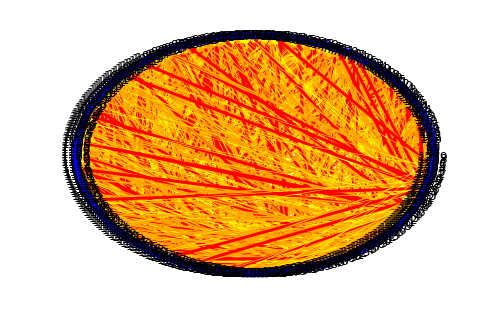

In [27]:
#the simulation
tick = 0
for tick in range(lenghtOfSim):
    
    listOfFs = []
    listOfPs = []
    lOfPairs = []
    Ds = []
    deltas = []
    taus = []
    chis = []
    
    edgeWidth = []
    edgeCol = []
    
    if typeOfSim == 'slow' or typeOfSim == 'medium':
        for (u,v,d) in agentGraph.edges(data=True):
            if d['weight'] < 0.3:
                edgeWidth.append(0.5)
                edgeCol.append('yellow')
            elif d['weight'] > 0.3 and d['weight'] < 0.7:
                edgeWidth.append(1.5)
                edgeCol.append('orange')
            elif d['weight'] > 0.7:
                edgeWidth.append(3)
                edgeCol.append('red')
    #the graph drawing
    if typeOfSim == 'slow':
        try:
            plt.clf()
            net.draw_circular(agentGraph, node_size =(300 / (howManyAgents/50)), width=edgeWidth,\
                              edge_color=edgeCol, node_color='blue', with_labels=True)
            display.display(plt.gcf())
            display.clear_output(wait=True)
        except KeyboardInterrupt:
            break
    if typeOfSim == 'medium':
        if (tick % 50) == 0:
            try:
                plt.clf()
                net.draw_circular(agentGraph, node_size =(300 / (howManyAgents/50)), width=edgeWidth,\
                                  edge_color=edgeCol, node_color='blue', with_labels=True)
                display.display(plt.gcf())
                display.clear_output(wait=True)
            except KeyboardInterrupt:
                break
    #start of the actual cycle
    rd.shuffle(worldRegistry)
    for agent in worldRegistry:
        if agent.amFree == True:
            tickPartner = agent.choosePartner(worldRegistry) 
            lOfPairs.append([agent, tickPartner])
        
        agent.interact()
        
    for i in range(len(lOfPairs)):
        modf.calculatePayoff(lOfPairs[i][0], lOfPairs[i][1], generalPayoffMatrix)    
        
    for agent in worldRegistry:
        agent.update(generalPayoffMatrix)
        for l in range(agent.partnersMemory.shape[1]):
            agentGraph.add_edge(agent.number, agent.partnersMemory[0,l], weight = agent.partnersMemory[1,l])
            
        #updates the datas for the plots
        Ds.append(agent.alwaysDefect)
        deltas.append(agent.pastWeighting)
        taus.append(agent.thresholdCoop)
        chis.append(agent.cliquishness)
    paramDatas.append([np.mean(Ds), np.mean(deltas), np.mean(taus), np.mean(chis)])
    pDs.append(len([agent for agent in worldRegistry if agent.alwaysDefect == 1]))
    pCs.append(len([agent for agent in worldRegistry if (agent.alwaysDefect == 0 and agent.cliquishness == 0)]))
    pCNMs.append(len([agent for agent in worldRegistry if (agent.alwaysDefect == 0 and agent.cliquishness == 0\
                                                    and agent.thresholdCoop > 1 - agent.pastWeighting)]))
    cliQs.append(len([agent for agent in worldRegistry if (agent.alwaysDefect == 0\
                                                  and agent.cliquishness == 1 and agent.pastWeighting == 0.5\
                                                  and agent.thresholdCoop == 0.15)]))
    oFTs.append(len([agent for agent in worldRegistry if (agent.alwaysDefect == 0 and agent.pastWeighting == 0 and\
                                                   agent.cliquishness == 0 and agent.thresholdCoop == 0.5)]))
    

    #death and repr
    listOfFs, listsOfPs = modf.listsOfProbs(worldRegistry, listOfFs, listOfPs)
    l = modf.dieOrReprChoice(worldRegistry, listsOfPs)
    worldRegistry = modf.die(l[1], worldRegistry)
    agentGraph.remove_node(l[1].number)
    D, delta, tau, chi = modf.varMutation(l[0].alwaysDefect, l[0].pastWeighting, l[0].thresholdCoop, l[0].cliquishness)
    aNewPerson = clP.Person(len(worldRegistry) + tick + 1, np.matrix([[], []]), l[0].memoryCapacity, 0, 0, D, \
                        delta, tau, chi, l[0].pairingError, l[0].strategyError,\
                        l[0].doCooperate, l[0].didOtherCoop, True, True, l[0].number, 0,\
                        0)
    worldRegistry.append(aNewPerson)
    agentGraph.add_node(aNewPerson.number, label = aNewPerson.number)
    
print("A simulation is finished!")
#the graph drawing
if typeOfSim == 'fast':
    edgeWidth = []
    edgeCol = []
    for (u,v,d) in agentGraph.edges(data=True):
        if d['weight'] < 0.3:
            edgeWidth.append(0.5)
            edgeCol.append('yellow')
        elif d['weight'] > 0.3 and d['weight'] < 0.7:
            edgeWidth.append(1.5)
            edgeCol.append('orange')
        elif d['weight'] > 0.7:
            edgeWidth.append(3)
            edgeCol.append('red')
            

    net.draw_circular(agentGraph, node_size =(300 / (howManyAgents/50)), width=edgeWidth,\
                              edge_color=edgeCol, node_color='blue', with_labels=True)

In [28]:
#The preparation of the results' analysis

DsFin = Ds
deltasFin = deltas
tausFin = taus
chisFin = chis
zerosIn = 0
zerosFin = 0
onesIn = 0
onesFin = 0
for i in range(len(DsFin)):
    
    if DsFin[i] == 0:
        zerosFin += 1
    else:
        onesFin += 1
        
    if DsIn[i] == 0:
        zerosIn += 1
    else:
        onesIn += 1

        
meanD = []
meanDeltas = []
meanTaus = []
meanChis = []
for j in range(lenghtOfSim): 
    meanD.append(paramDatas[j][0])
    meanDeltas.append(paramDatas[j][1])
    meanTaus.append(paramDatas[j][2])
    meanChis.append(paramDatas[j][3])


deltaVal0 = []
deltaVal1 = []
tauVal0 = []
tauVal1 = []
chiVal0 = []
chiVal1 = []
for agent in worldRegistry:
    if agent.alwaysDefect == 0: 
        deltaVal0.append(agent.pastWeighting)
        tauVal0.append(agent.thresholdCoop)
        chiVal0.append(agent.cliquishness)
    else: 
        deltaVal1.append(agent.pastWeighting)
        tauVal1.append(agent.thresholdCoop)
        chiVal1.append(agent.cliquishness)

### A breaf statistical analysis of the four parameters governing the model

The following two couples are respectively the two distribution before the beginning of the simulation and at its end of the parameter alwaysDefect. The first value corresponds to the number of zeros.

In [29]:
print((zerosIn,onesIn))
print((zerosFin, onesFin))

(151, 149)
(173, 127)


The distribution of the parameter pastWeighting at the beginning and at the end of the simulation had mean, variance, quintiles and extrema as below. The first set of values is referred to the beginning of the simulation the second to its end. 

In [30]:
print((np.mean(deltasIn), np.var(deltasIn)), (np.percentile(deltasIn, [20, 40, 60, 80])), (min(deltasIn), max(deltasIn)))
      
print((np.mean(deltasFin), np.var(deltasFin)), (np.percentile(deltasFin, [20, 40, 60, 80])), (min(deltasFin), max(deltasFin)))

(0.5133300841218238, 0.08525771698596135) [0.19264296 0.4083102  0.61275201 0.82401706] (0.004067257381084266, 0.9977369589584113)
(0.6222988124902691, 0.060446124226257454) [0.44893402 0.59971558 0.73150675 0.83955032] (0.0022910820154972283, 0.9981131002602864)


The distribution of the parameter thresholdCoop at the beginning and at the end of the simulation had mean, variance, quintiles and extrema as below. The first set of values is referred to the beginning of the simulation the second to its end. 

In [31]:
print((np.mean(tausIn), np.var(tausIn)), (np.percentile(tausIn, [20, 40, 60, 80])), (min(tausIn), max(tausIn)))
      
print((np.mean(tausFin), np.var(tausFin)), (np.percentile(tausFin, [20, 40, 60, 80])), (min(tausFin), max(tausFin)))

(0.4810143571205084, 0.0783122132884932) [0.20310945 0.38354555 0.57221756 0.7743068 ] (0.0017751979285414166, 0.9831362891243558)
(0.5003749842348764, 0.06810083826316868) [0.25444707 0.41135529 0.56251898 0.74070042] (0.0006021061218314597, 0.9861107733690652)


The distribution of the parameter cliquishness at the beginning and at the end of the simulation had mean, variance, quintiles and extrema as below. The first set of values is referred to the beginning of the simulation the second to its end. 

In [32]:
print((np.mean(chisIn), np.var(chisIn)), (np.percentile(chisIn, [20, 40, 60, 80])), (min(chisIn), max(chisIn)))
      
print((np.mean(chisFin), np.var(chisFin)), (np.percentile(chisFin, [20, 40, 60, 80])), (min(chisFin), max(chisFin)))

(0.5335769960943467, 0.08887357427756337) [0.23040854 0.43532617 0.64570631 0.84863322] (0.0017989094526071892, 0.9988226049490058)
(0.5196120208866066, 0.09584306383091534) [0.17155204 0.41482808 0.66940534 0.85615289] (0.0024965905769823438, 0.9988205531799981)


<Figure size 432x288 with 0 Axes>

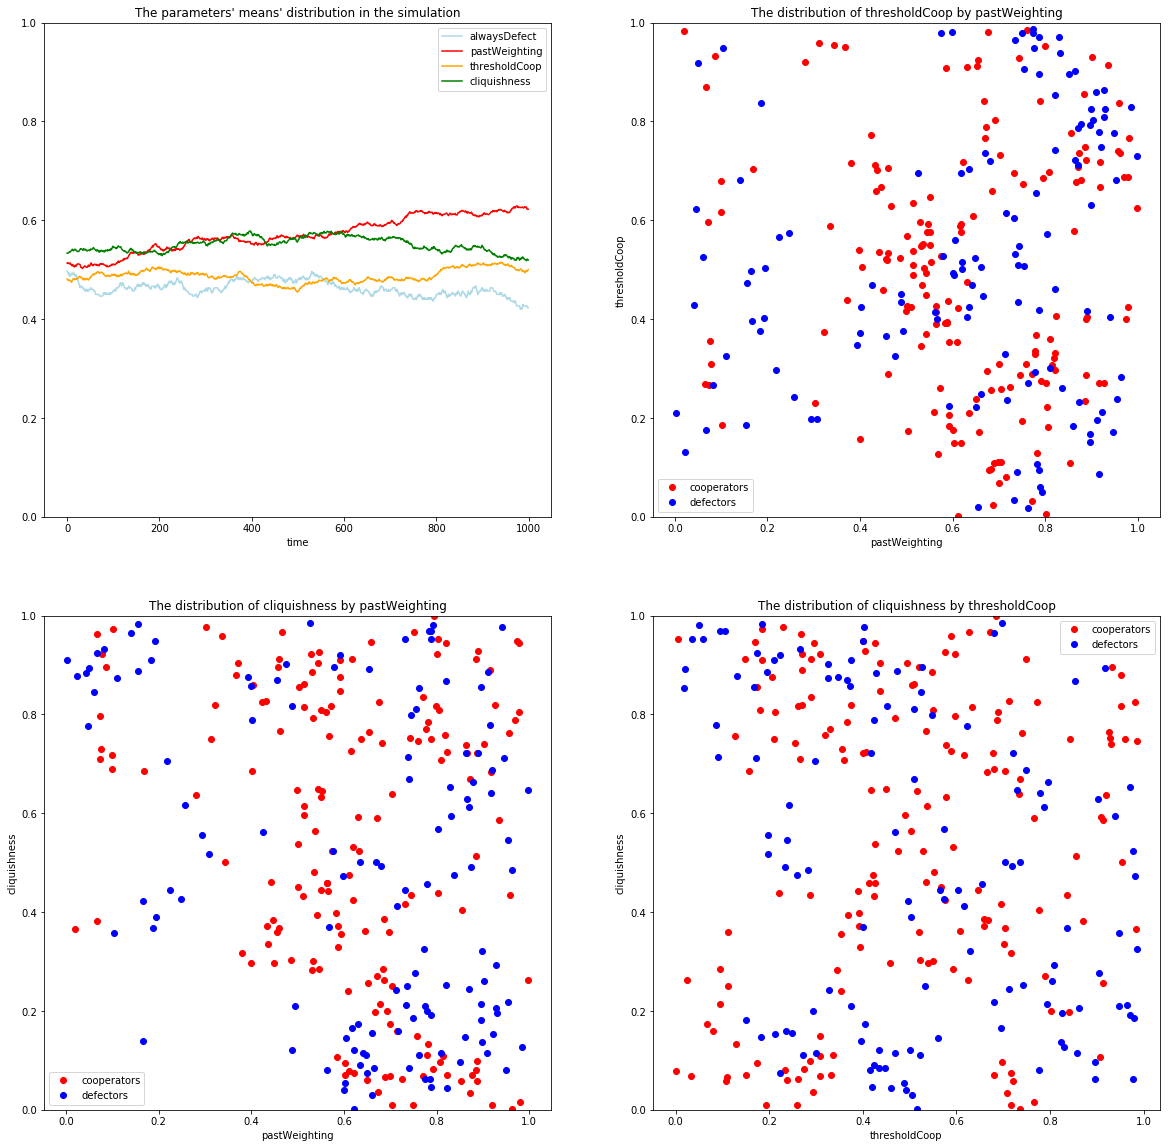

In [33]:

fig = plt.figure()
fig.suptitle("Simulation's plots")
fig, ax_lst = plt.subplots(2, 2, figsize = (20, 20))
ax = ax_lst[0, 0]
ax1 = ax_lst[0, 1]
ax2 = ax_lst[1, 0]
ax3 = ax_lst[1, 1]
ax.set_title("The parameters' means' distribution in the simulation")
ax.plot(range(lenghtOfSim), meanD, color = 'lightblue', label = 'alwaysDefect')
ax.plot(range(lenghtOfSim), meanDeltas, color = 'red', label = 'pastWeighting')
ax.plot(range(lenghtOfSim), meanTaus, color = 'orange', label = 'thresholdCoop')
ax.plot(range(lenghtOfSim), meanChis, color = 'green', label = 'cliquishness')
ax.set_xlabel("time")
ax.set_ybound(lower=0, upper=1)
ax.legend()

ax1.set_title("The distribution of thresholdCoop by pastWeighting")
ax1.plot(deltaVal0, tauVal0, 'ro', label = 'cooperators')
ax1.plot(deltaVal1, tauVal1, 'bo',  label = 'defectors')
ax1.set_xlabel("pastWeighting")
ax1.set_ylabel("thresholdCoop")
ax1.set_ybound(lower=0, upper=1)
ax1.legend()

ax2.set_title("The distribution of cliquishness by pastWeighting")
ax2.plot(deltaVal0, chiVal0, 'ro', label = 'cooperators')
ax2.plot(deltaVal1, chiVal1, 'bo',  label = 'defectors')
ax2.set_xlabel("pastWeighting")
ax2.set_ylabel("cliquishness")
ax2.set_ybound(lower=0, upper=1)
ax2.legend()

ax3.set_title("The distribution of cliquishness by thresholdCoop")
ax3.plot(tauVal0, chiVal0, 'ro',  label = 'cooperators')
ax3.plot(tauVal1, chiVal1, 'bo',  label = 'defectors')
ax3.set_xlabel("thresholdCoop")
ax3.set_ylabel("cliquishness")
ax3.set_ybound(lower=0, upper=1)
ax3.legend()

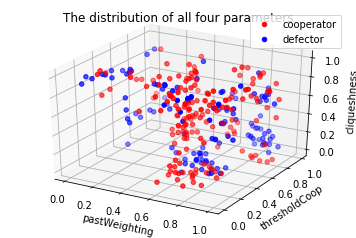

In [34]:
fig2 = plt.figure()
ax4 = fig2.add_subplot(111, projection='3d')
ax4.scatter(deltaVal0, tauVal0, chiVal0, color = 'red', label = 'cooperator')
ax4.scatter(deltaVal1, tauVal1, chiVal1, color = 'blue', label = 'defector')
ax4.set_title("The distribution of all four parameters")
ax4.set_xlabel("pastWeighting")
ax4.set_ylabel("thresholdCoop")
ax4.set_zlabel("cliqueshness")
ax4.legend()

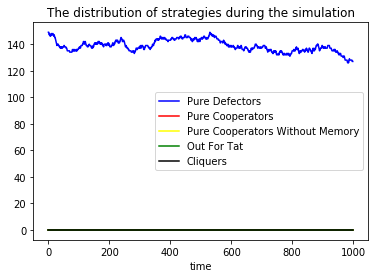

In [35]:
fig3 = plt.figure()
ax4 = fig3.add_subplot(111)
ax4.set_title("The distribution of strategies during the simulation")
ax4.set_xlabel('time')
ax4.plot(range(lenghtOfSim), pDs, color = 'blue', label = 'Pure Defectors')
ax4.plot(range(lenghtOfSim), pCs, color = 'red', label = 'Pure Cooperators')
ax4.plot(range(lenghtOfSim), pCNMs, color = 'yellow', label = 'Pure Cooperators Without Memory')
ax4.plot(range(lenghtOfSim), oFTs, color = 'green', label = 'Out For Tat')
ax4.plot(range(lenghtOfSim), cliQs, color = 'black',label = 'Cliquers')
ax4.legend()

### Some basic network analysis of the graph created by the interaction of the agents

First of all, the distribution of the degrees and of the weights.

Text(0,0.5,'Number of Edges')

<Figure size 432x288 with 0 Axes>

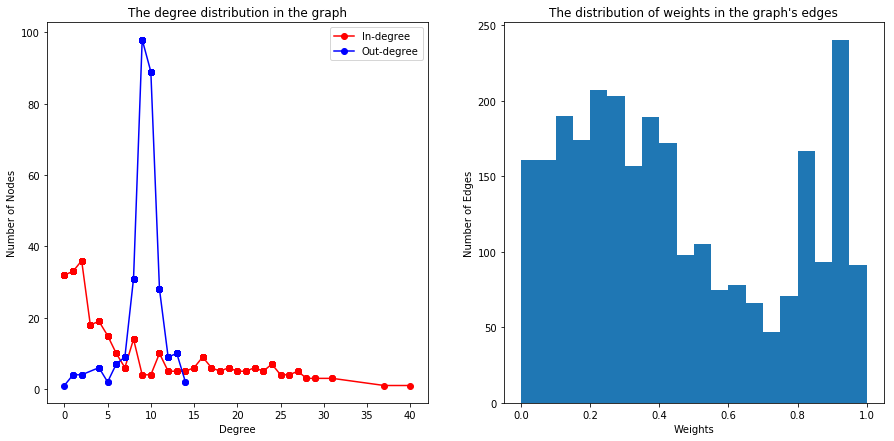

In [37]:
inDeg = agentGraph.in_degree() 
inVal = sorted([v for (u,v) in inDeg])
inHist = [inVal.count(x) for x in inVal]
outDeg = agentGraph.out_degree()
outVal = sorted([v for (u,v) in outDeg])
outHist = [outVal.count(x) for x in outVal]
wwList = [d['weight']for (u,v,d) in agentGraph.edges(data=True)]
fig4 = plt.figure()
fig4, ax_lst2 = plt.subplots(1, 2, figsize = (15, 7))
ax5 = ax_lst2[0]
ax5.set_title('The degree distribution in the graph')
ax5.plot(inVal,inHist,'ro-')
ax5.plot(outVal,outHist,'bo-') 
ax5.set_xlabel('Degree') 
ax5.set_ylabel('Number of Nodes')
ax5.legend(['In-degree','Out-degree'])
ax6 = ax_lst2[1]
ax6.set_title("The distribution of weights in the graph's edges")
ax6.hist(wwList, 20)
ax6.set_xlabel('Weights') 
ax6.set_ylabel('Number of Edges')

Secondly, some other values of the network, which are respectively:

  1) mean, variance, quintiles and extrema of the clustering coefficient

  2) the number of connected components 

  3) mean, variance, quintiles and extrema of the betweenness centrality

  4) the biggest clique

In [38]:
agentGraphUN = agentGraph.to_undirected()
clCoeffs = [v for v in net.clustering(agentGraphUN).values()]
aGphComponents = list(net.connected_component_subgraphs(agentGraphUN))
btwCen = list(net.betweenness_centrality(agentGraph, weight = 'weight', normalized=True).values())
cliqueList = list(net.node_clique_number(agentGraphUN).values())

print('1) ',(np.mean(clCoeffs), np.var(clCoeffs)), (np.percentile(clCoeffs, [20, 40, 60, 80])), (min(clCoeffs), max(clCoeffs)))
print('2) ',len(aGphComponents))
print('3) ',(np.mean(btwCen), np.var(btwCen)), (np.percentile(btwCen, [20, 40, 60, 80])), (min(btwCen), max(btwCen)))
print('4) ', max(cliqueList))

1)  (0.08170771617477326, 0.0017296207299536273) [0.05537489 0.07126437 0.0862069  0.10925075] (0, 0.23636363636363636)
2)  2
3)  (0.010853572310385851, 0.00031789239471498727) [6.50939373e-05 2.52519584e-03 6.21534870e-03 1.57796682e-02] (0.0, 0.10653520684159727)
4)  5
